In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import sys



#This function extracts the high symmetry points from the output of bandx.out
def Symmetries(fstring): 
  f = open(fstring,'r')
  x = np.zeros(0)
  for i in f:
    if "high-symmetry" in i:
      x = np.append(x,float(i.split()[-1]))
  f.close()
  return x
# This function takes in the datafile, the fermi energy, the symmetry file, a subplot, and the label
# It then extracts the band data, and plots the bands, the fermi energy in red, and the high symmetry points
def bndplot(datafile,fermi,symmetryfile,subplot,**kwargs):
  ## necessary:
  # datafile is the bands.dat.gnu file generated from band.x
  # fermi is the Fermi energy
  # symmetryfile is the standard output file of band.x (bands.pp.out)
  # subplot is the axes that you want to plot the band on

  ## optional:
  # use name_k_points=['L','G','X','U','G'] where G is Gamma point to label the high symmetry points. It must have the same length as the variable 'temp'
  # use shift_fermi=1 to shift the Fermi energy to zero
  # use color='black' to manually set the color of the band structure plot. Useful to plot two band structure together for comparison
  # use linestyle='dashed' to manually set the linestyle of the band structure plot. Useful to plot two band structure together for comparison
  # use range=[-5,5] to set the energy range for plotting the band structure
  # use legend='Si, PBE' to set the legend of the bands

  if 'shift_fermi' in kwargs:
    bool_shift_efermi = kwargs['shift_fermi']
  else:
    bool_shift_efermi = 0
  if 'color' in kwargs:
    color_bnd=kwargs['color']
  else:
    color_bnd='black'
  if 'linestyle' in kwargs:
    line_bnd=kwargs['linestyle']
  else:
    line_bnd='solid'
  
  z = np.loadtxt(datafile) #This loads the bandx.dat.gnu file
  x = np.unique(z[:,0]) #This is all the unique x-points
  bands = []
  bndl = len(z[z[:,0]==x[1]]) #This gives the number of bands in the calculation
  Fermi = float(fermi)
  if bool_shift_efermi:
    fermi_shift=Fermi
  else:
    fermi_shift=0
  axis = [min(x),max(x)]
  for i in range(0,bndl):
    bands.append(np.zeros([len(x),2])) #This is where we storre the bands
  for i in range(0,len(x)):
    sel = z[z[:,0] == x[i]]  #Here is the energies for a given x
    test = []
    for j in range(0,bndl): #This separates it out into a single band
      bands[j][i][0] = x[i]
      #bands[j][i][1] = np.multiply(sel[j][1],13.605698066)
      bands[j][i][1] = sel[j][1]
  for i in bands: #Here we plots the bands
    subplot.plot(i[:,0],i[:,1]-fermi_shift,color=color_bnd,linestyle=line_bnd)
  if 'legend' in kwargs:
    #empty plot to generate legend
    subplot.plot([None],[None],color=color_bnd,linestyle=line_bnd,label=kwargs['legend'])
  temp = Symmetries(symmetryfile)
  for j in temp: #This is the high symmetry lines
    x1 = [j,j]
    #x2 = [fermi-10,fermi+10]
    #subplot.plot(x1,x2,'--',lw=0.55,color='black',alpha=0.75)
    subplot.axvline(x=j,linestyle='solid',color='gray',alpha=0.5)
  subplot.plot([min(x),max(x)],[Fermi-fermi_shift,Fermi-fermi_shift],color='red',linestyle='dotted')
  subplot.set_xticks(temp)
  subplot.set_xticklabels([])
  if 'name_k_points' in kwargs:
    if len(kwargs['name_k_points'])==len(temp):
      subplot.set_xticklabels(kwargs['name_k_points'])
  if 'range' in kwargs:
    range_plot=kwargs['range']
    subplot.set_ylim([range_plot[0],range_plot[1]])
  subplot.set_xlim([axis[0],axis[1]])
  subplot.set_xlabel('k')
  subplot.set_ylabel('energy (eV)')
  if 'legend' in kwargs:
    subplot.legend()
  return bands  

In [2]:
SMALL_SIZE  = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)        # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('xtick', labelsize=SMALL_SIZE) # fontsize of the x tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) # fontsize of the y tick labels
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels

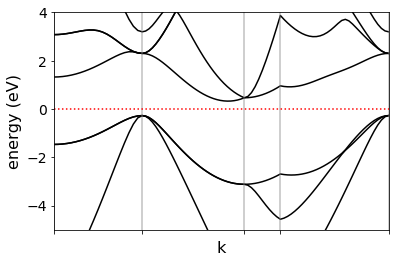

In [3]:
datafile='Si.bands.gnu'
fermi = 6.5
symmetryfile='Si.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',name_k_points=['G','M','K','G','A','L','H','A','L','M','K','H'],range=[-5,4])

#fig.savefig("PtS2bands.png")
plt.show()

(-2, 2)

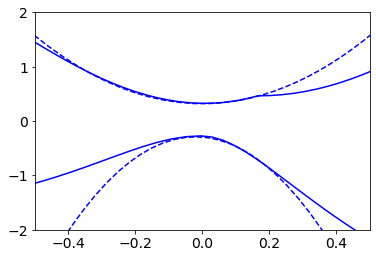

In [4]:
k6 = band[3][:,0]
Ek6 = band[3][:,1]
k7 = band[4][:,0]
Ek7 = band[4][:,1]

def puddingfit(x,n):
    A = -12
    x0 = 1.63
    Delta = -0.29
    return A*(x-x0)**n+Delta

pud5 = puddingfit(k6,2)

def puddingfit(x,n):
    A = 5
    x0 = 0.85
    Delta = 0.32
    return A*(x-x0)**n+Delta

pud6 = puddingfit(k7,2)

#plt.figure(figsize=(4,4))
plt.plot(k6-0.85,pud6,'b--')
plt.plot(k6-0.87,Ek6-6.5,'b-')
plt.plot(k7-1.65,pud5,'b--')
plt.plot(k7-1.7,Ek7-6.5,'b-')
plt.xlim([-0.5,0.5])
plt.ylim([-2,2])

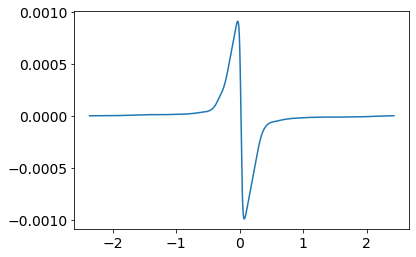

In [5]:
datafile = 'Si(2).trace'
trace = np.loadtxt(datafile,skiprows=1)
Ef0 = 6.51

EfSi = trace[:,0]*13.6 - Ef0
SSi = trace[:,4]
sigmaSi = trace[:,5]*10**(-14)
kappaSi = trace[:,7]*10**(-14)

plt.plot(EfSi,SSi)

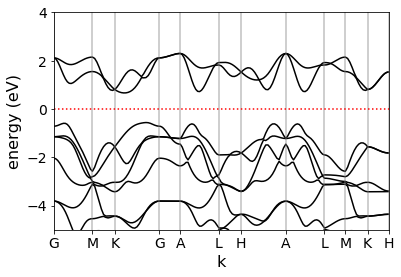

In [6]:
datafile='PtS2.bands.gnu'
fermi = 7.5
symmetryfile='PtS2.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',name_k_points=['G','M','K','G','A','L','H','A','L','M','K','H'],range=[-5,4])

fig.savefig("PtS2bands.png")
plt.show()

(-2, 2)

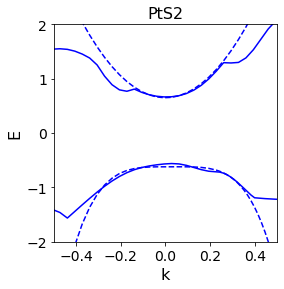

In [7]:
k1 = band[11][:,0]
Ek1 = band[11][:,1]
k0 = band[10][:,0]
Ek0 = band[10][:,1]

def puddingfit(x,n):
    A = -40
    x0 = 1.38
    Delta = -0.62
    return A*(x-x0)**n+Delta

pud = puddingfit(k0,4)

def puddingfit(x,n):
    A = 10
    x0 = 1.05
    Delta = 0.65
    return A*(x-x0)**n+Delta

pud2 = puddingfit(k1,2)

plt.figure(figsize=(4,4))
plt.plot(k1-1.05,pud2,'b--')
plt.plot(k1-1.05,Ek1-7.5,'b-')
plt.plot(k0-1.35,pud,'b--')
plt.plot(k0-1.35,Ek0-7.5,'b-')
plt.title('PtS2', fontsize=16)
plt.xlabel('k')
plt.ylabel('E')
plt.xlim([-0.5,0.5])
plt.ylim([-2,2])

Text(0, 0.5, 'Power Factor ($\\mathrm{mW/mK^2}$)')

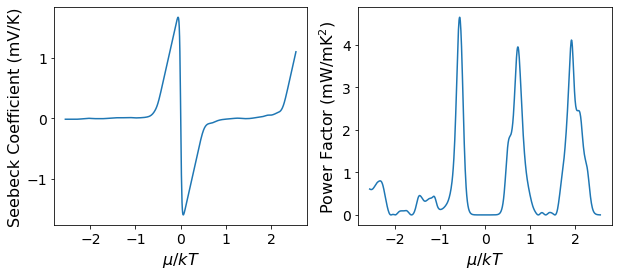

In [8]:
datafile = 'PtS2(2).trace'
trace = np.loadtxt(datafile,skiprows=1)
Ef0 = 7.5
T0 = 350

Ef = trace[:,0]*13.6 - Ef0
S = trace[:,4]
sigma = trace[:,5]*10**(-14)
kappa = trace[:,7]*10**(-14)

plt.figure(figsize=(10,4))

ax1=plt.subplot(1,2,1)
plt.plot(Ef,S*1000)
plt.xlabel('$\mu/kT$')
plt.ylabel('Seebeck Coefficient (mV/K)')

ax2=plt.subplot(1,2,2)
plt.plot(Ef,sigma*S**2*1000)
plt.xlabel('$\mu/kT$')
plt.ylabel('Power Factor ($\mathrm{mW/mK^2}$)')

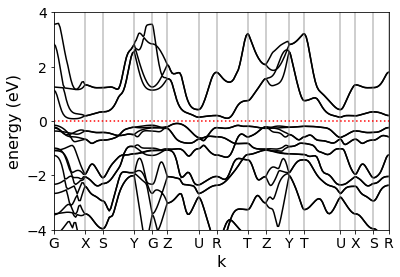

In [9]:
datafile='FeAs2.bands.gnu'
fermi = 8.6854
symmetryfile='FeAs2.bands.out'
bool_shift_efermi= True
fig, ax = plt.subplots()

#bndplot(datafile,fermi,symmetryfile,ax)
band3 = bndplot(datafile,fermi,symmetryfile,ax,shift_fermi=bool_shift_efermi,color='black',linestyle='solid',name_k_points=['G','X','S','Y','G','Z','U','R','T','Z','Y','T','U','X','S','R'],range=[-4,4])


#fig.savefig("BaPdS2bands.png")
plt.show()

(-2, 2)

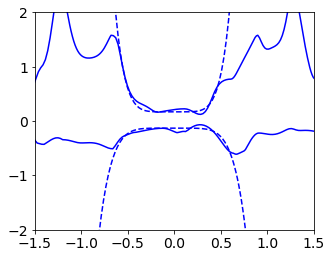

In [10]:
k4 = band3[26][:,0]
Ek4 = band3[26][:,1]
k5 = band3[25][:,0]
Ek5 = band3[25][:,1]

def puddingfit(x,n):
    A = -8
    x0 = 1.68
    Delta = -0.13
    return A*(x-x0)**n+Delta

pud3 = puddingfit(k5,6)

def puddingfit(x,n):
    A = 35
    x0 = 2.48
    Delta = 0.17
    return A*(x-x0)**n+Delta

pud4 = puddingfit(k4,6)

plt.figure(figsize=(5,4))
plt.plot(k4-2.5,pud4,'b--')
plt.plot(k4-2.5,Ek4-8.665,'b-')
plt.plot(k5-1.7,pud3,'b--')
plt.plot(k5-1.7,Ek5-8.665,'b-')
plt.xlim([-1.5,1.5])
plt.ylim([-2,2])

In [11]:
datafile = 'FeAs2.trace'
trace = np.loadtxt(datafile,skiprows=1)
Ef0 = 8.665

Ef2 = trace[:,0]*13.6 - Ef0
S2 = trace[:,4]
sigma2 = trace[:,5]*10**(-14)
kappa2 = trace[:,7]*10**(-14)

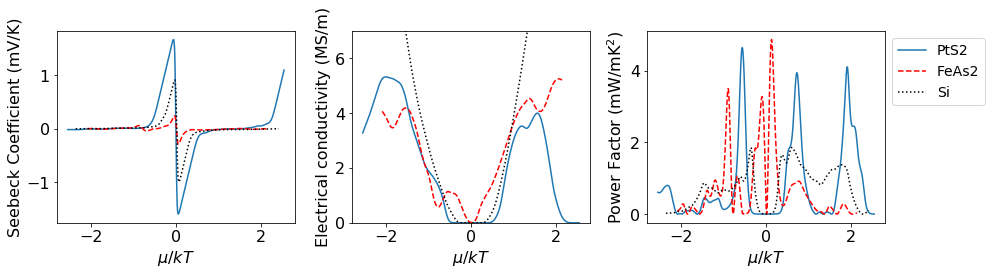

In [15]:
plt.rc('xtick', labelsize=MEDIUM_SIZE) # fontsize of the x tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE) # fontsize of the y tick labels

plt.figure(figsize=(14,4))

ax1=plt.subplot(1,3,1)
plt.plot(Ef,S*1000)
plt.plot(Ef2,S2*1000,'r--',label='FeAs2')
plt.plot(EfSi,SSi*1000,'k:')
plt.xlabel('$\mu/kT$')
plt.ylabel('Seebeck Coefficient (mV/K)',fontsize=16)
plt.tight_layout()


ax2=plt.subplot(1,3,2)
plt.plot(Ef,sigma/1000000)
plt.plot(Ef2,sigma2/1000000,'r--',label='FeAs2')
plt.plot(EfSi,sigmaSi/1000000,'k:')
plt.ylim([0,7])
plt.xlabel('$\mu/kT$')
plt.ylabel('Electrical conductivity (MS/m)')
plt.tight_layout()

ax3=plt.subplot(1,3,3)
plt.plot(Ef,sigma*S**2*1000,label='PtS2')
plt.plot(Ef2,sigma2*S2**2*1000,'r--',label='FeAs2')
plt.plot(EfSi,sigmaSi*SSi**2*1000,'k:',label='Si')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('$\mu/kT$')
plt.ylabel('Power Factor ($\mathrm{mW/mK^2}$)')
plt.tight_layout()

plt.savefig('FigTEPFreal.pdf')

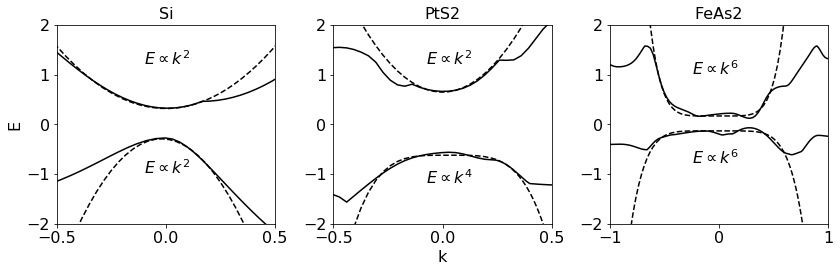

In [16]:
plt.rc('xtick', labelsize=MEDIUM_SIZE)

plt.figure(figsize=(12,4))

ax1 = plt.subplot(1,3,1)
plt.plot(k6-0.85,pud6,'k--')
plt.plot(k6-0.87,Ek6-6.5,'k-')
plt.plot(k7-1.65,pud5,'k--')
plt.plot(k7-1.7,Ek7-6.5,'k-')
plt.title('Si', fontsize=16)
#plt.xlabel('k')
plt.ylabel('E',fontsize=16)
plt.text(-0.1,1.2,r'$E\propto k^2$',color='k',fontsize=16)
plt.text(-0.1,-1.0,r'$E\propto k^2$',color='k',fontsize=16)
plt.xlim([-0.5,0.5])
plt.ylim([-2,2])
plt.tight_layout()
ax1.set_xticks([-0.5,0,0.5])


ax2 = plt.subplot(1,3,2)
plt.plot(k1-1.05,pud2,'k--')
plt.plot(k1-1.05,Ek1-7.5,'k-')
plt.plot(k0-1.35,pud,'k--')
plt.plot(k0-1.35,Ek0-7.5,'k-')
plt.title('PtS2', fontsize=16)
plt.xlabel('k',fontsize=16)
#plt.ylabel('E', fontsize=14)
plt.text(-0.075,1.2,r'$E\propto k^2$',color='k',fontsize=16)
plt.text(-0.075,-1.2,r'$E\propto k^4$',color='k',fontsize=16)
plt.xlim([-0.5,0.5])
plt.ylim([-2,2])
plt.tight_layout()
ax2.set_xticks([-0.5,0,0.5])

ax3 = plt.subplot(1,3,3)
plt.plot(k4-2.5,pud4,'k--')
plt.plot(k4-2.5,Ek4-8.665,'k-')
plt.plot(k5-1.7,pud3,'k--')
plt.plot(k5-1.7,Ek5-8.665,'k-')
plt.title('FeAs2', fontsize=16)
#plt.xlabel('k',fontsize=14)
plt.text(-0.25,1.0,r'$E\propto k^6$',color='k',fontsize=16)
plt.text(-0.25,-0.8,r'$E\propto k^6$',color='k',fontsize=16)
#plt.ylabel('E')
plt.xlim([-1,1])
plt.ylim([-2,2])
plt.tight_layout()
ax3.set_xticks([-1,0,1])

plt.savefig('FigTEmatband.pdf')